In [ ]:
!pip3 install easyocr
!pip3 install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.5 MB/s eta 0:00:00


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

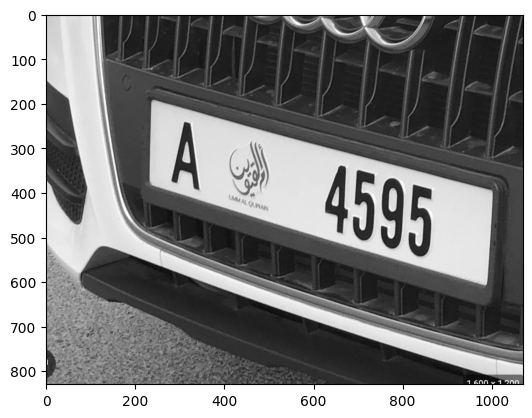

In [ ]:
img = cv2.imread('duh.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

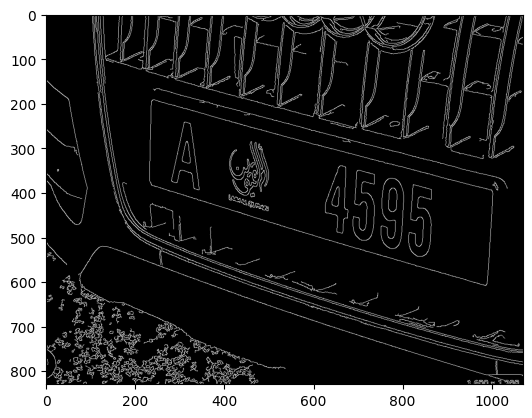

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[236, 195]],

       [[237, 384]],

       [[989, 605]],

       [[999, 394]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

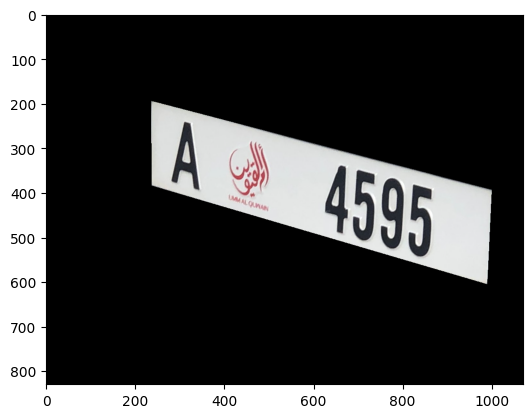

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

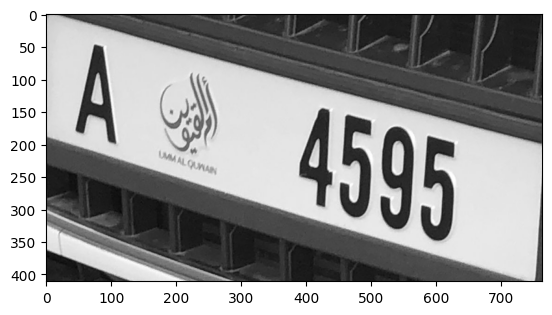

In [ ]:

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[49, 57], [111, 57], [111, 181], [49, 181]], 'A', 0.9343210925970347),
 ([[160, 88], [280, 88], [280, 216], [160, 216]], '6', 0.4264893347102685),
 ([[399.960339805259, 108.02350969622489],
   [683.8559888421981, 185.8364986403498],
   [626.0396601947409, 374.9764903037751],
   [341.14401115780186, 298.16350135965024]],
  '4595',
  0.9987625479698181),
 ([[171.41165159458544, 201.05825797292724],
   [271.99116345650475, 232.76991050334578],
   [262.58834840541454, 256.94174202707273],
   [162.00883654349525, 225.23008949665422]],
  'Ualanh',
  0.01956422109725675)]

In [ ]:
s=set()
for i in result:
  s.add(i[-2])
s

{'4595', '6', 'A', 'Ualanh'}

In [ ]:
import re

emirates_patterns = {
    "Abu Dhabi": r'^Ab[a-z]*i$',
    "Dubai": r'\bDubai\b',
    "Sharjah": r'\bSharjah\b',
    "Ras Al Khaimah": r'^R[A-za-z]*K[a-z]\b',
    "Fujairah": r'\bFujairah\b',
    "Umm Al Quwain": r'^[Uu][a-z]*[Aa][a-z]*[a-z]*$',
    "Ajman": r'\bAjman\b'
}

for i in s:
  for j in emirates_patterns:
    if re.search(emirates_patterns[j],i,re.IGNORECASE):
      print(f"'{i}' corresponds to '{j}'")
      break




'Ualanh' corresponds to 'Umm Al Quwain'
